In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from sklearn.linear_model import LinearRegression
import geopandas as gpd

In [44]:
pd.set_option('display.max_columns', None)
#retirar os valores em notação científica
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Data SUS

Um breve texto explicando o que é o DataSUS e o que é esperado dos dados.

## Extração de dados

In [45]:
df = pd.read_csv('resultado.csv', sep=',', encoding='utf-8')
df.tail()

,Município,Data,Quantidade Aprovada,UF,Região,LONGITUDE,LATITUDE,População,Faixa Populacional,Valor Aprovado,IBGE
334195,VIANOPOLIS,2019-01-01,480.000,Goiás,Centro-Oeste,-48.513,-16.742,14956,10 a 50 mil,32328.840,5222005
334196,VICENTINOPOLIS,2019-01-01,134.000,Goiás,Centro-Oeste,-49.807,-17.733,8768,Até 10 mil,8498.640,5222054
334197,VILA BOA,2019-01-01,0.000,Goiás,Centro-Oeste,-47.057,-15.035,4215,Até 10 mil,0.000,5222203
334198,VILA PROPICIO,2019-01-01,0.000,Goiás,Centro-Oeste,-48.882,-15.455,5815,Até 10 mil,0.000,5222302
334199,BRASILIA,2019-01-01,905779.000,Distrito Federal,Centro-Oeste,-47.888,-15.794,2817068,Acima de 1 milhão,20192152.350,5300108


## Tratamento dos Dados

In [46]:
#drop os valores nulos
df.dropna(inplace=True)

In [47]:
df['Data'] = pd.to_datetime(df['Data'], format='%Y-%m-%d')

In [48]:
df = df[(df['Quantidade Aprovada'] > 0) & (df['Valor Aprovado'] > 0)]

## Qualidade de Dados

In [49]:
print('Quantidade de valores duplicados: ',df.duplicated().sum()) # Consistência
print('Quantidade de valores nulos: ',df.isnull().sum().sum()) # Completude
print('Os tipos de dados são: ',df.dtypes.unique()) # Conformidade
print('Anos presentes no dataset: ',df['Data'].dt.year.unique()) # Temporalidade
# Integridade, Os outliers são valores que o contexto do Brasil explica, já que os municípios possuem diferentes tamanhos e populaçõesS
# Precisão, acredita-se que os dados foram preenchidos corretamente

Quantidade de valores duplicados:  0
Quantidade de valores nulos:  0
Os tipos de dados são:  [dtype('O') dtype('<M8[ns]') dtype('float64') dtype('int64')]
Anos presentes no dataset:  [2023 2022 2021 2020 2019]


## Análise Descritiva

In [50]:
df[['Quantidade Aprovada', 'Valor Aprovado']].describe()

,Quantidade Aprovada,Valor Aprovado
count,180481.000,180481.000
mean,10194.241,486101.097
std,51427.828,2574210.575
min,1.000,44.220
25%,122.000,10923.610
50%,557.000,34003.560
75%,2860.000,123789.600
max,1519506.000,73152695.570


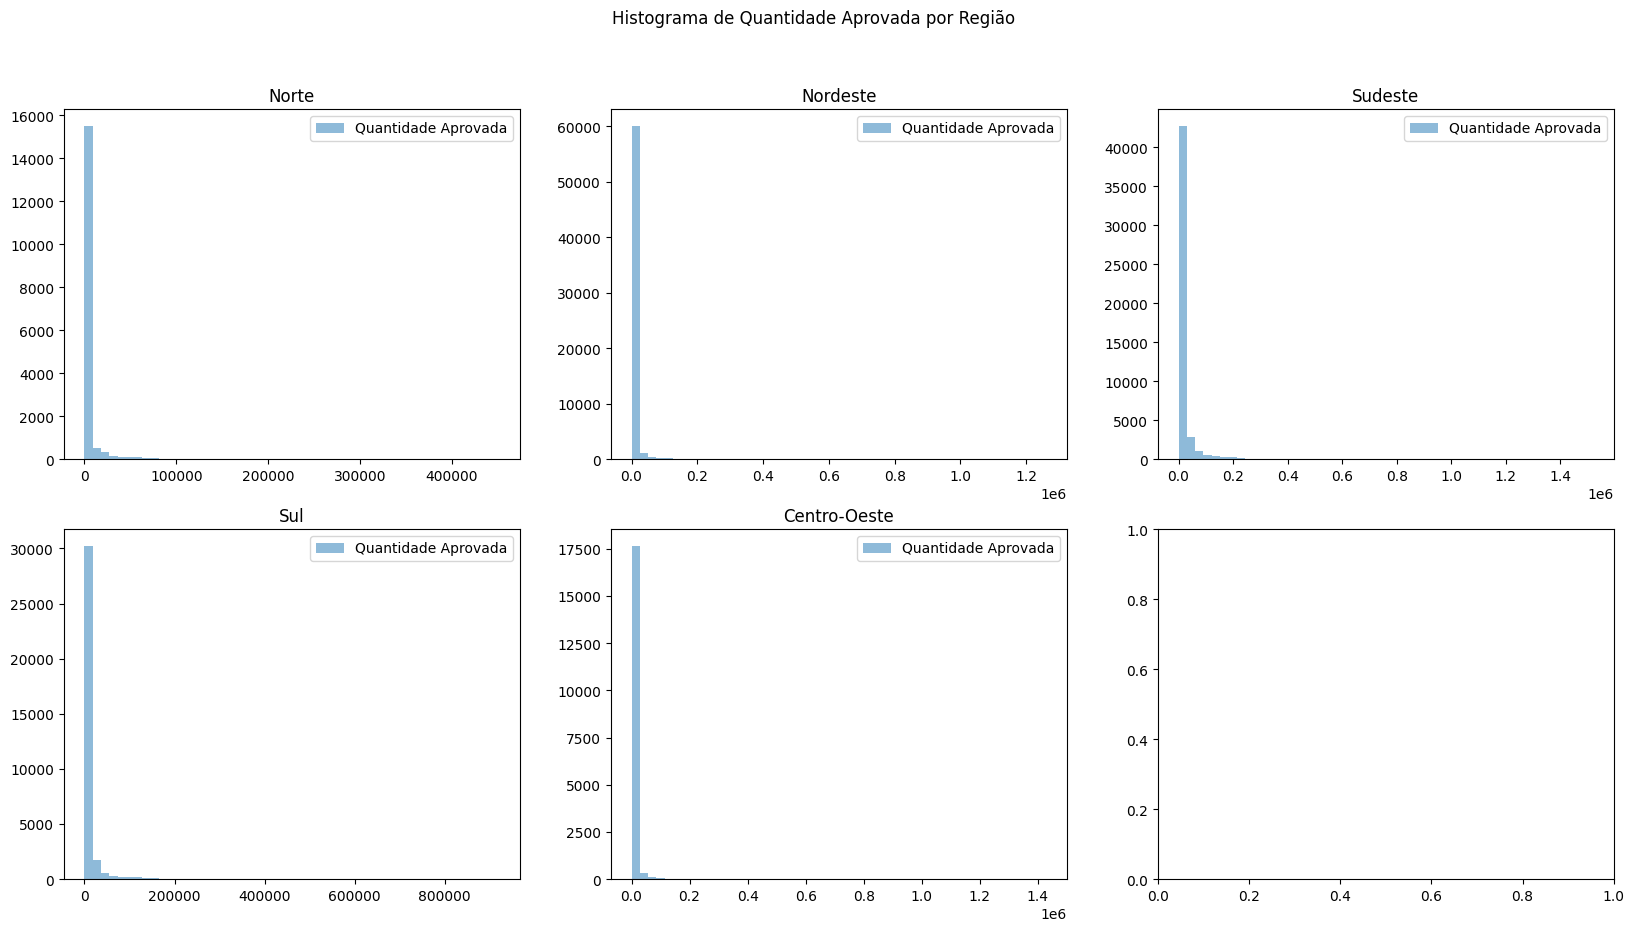

In [51]:
fig, axs = plt.subplots(2, 3, figsize=(20, 10))
fig.suptitle('Histograma de Quantidade Aprovada por Região')
for i, regiao in enumerate(df['Região'].unique()):
    df_regiao = df[df['Região'] == regiao]
    axs[i//3, i%3].hist(df_regiao['Quantidade Aprovada'], bins=50, alpha=0.5, label='Quantidade Aprovada')
    axs[i//3, i%3].set_title(regiao)
    axs[i//3, i%3].legend()

plt.show()

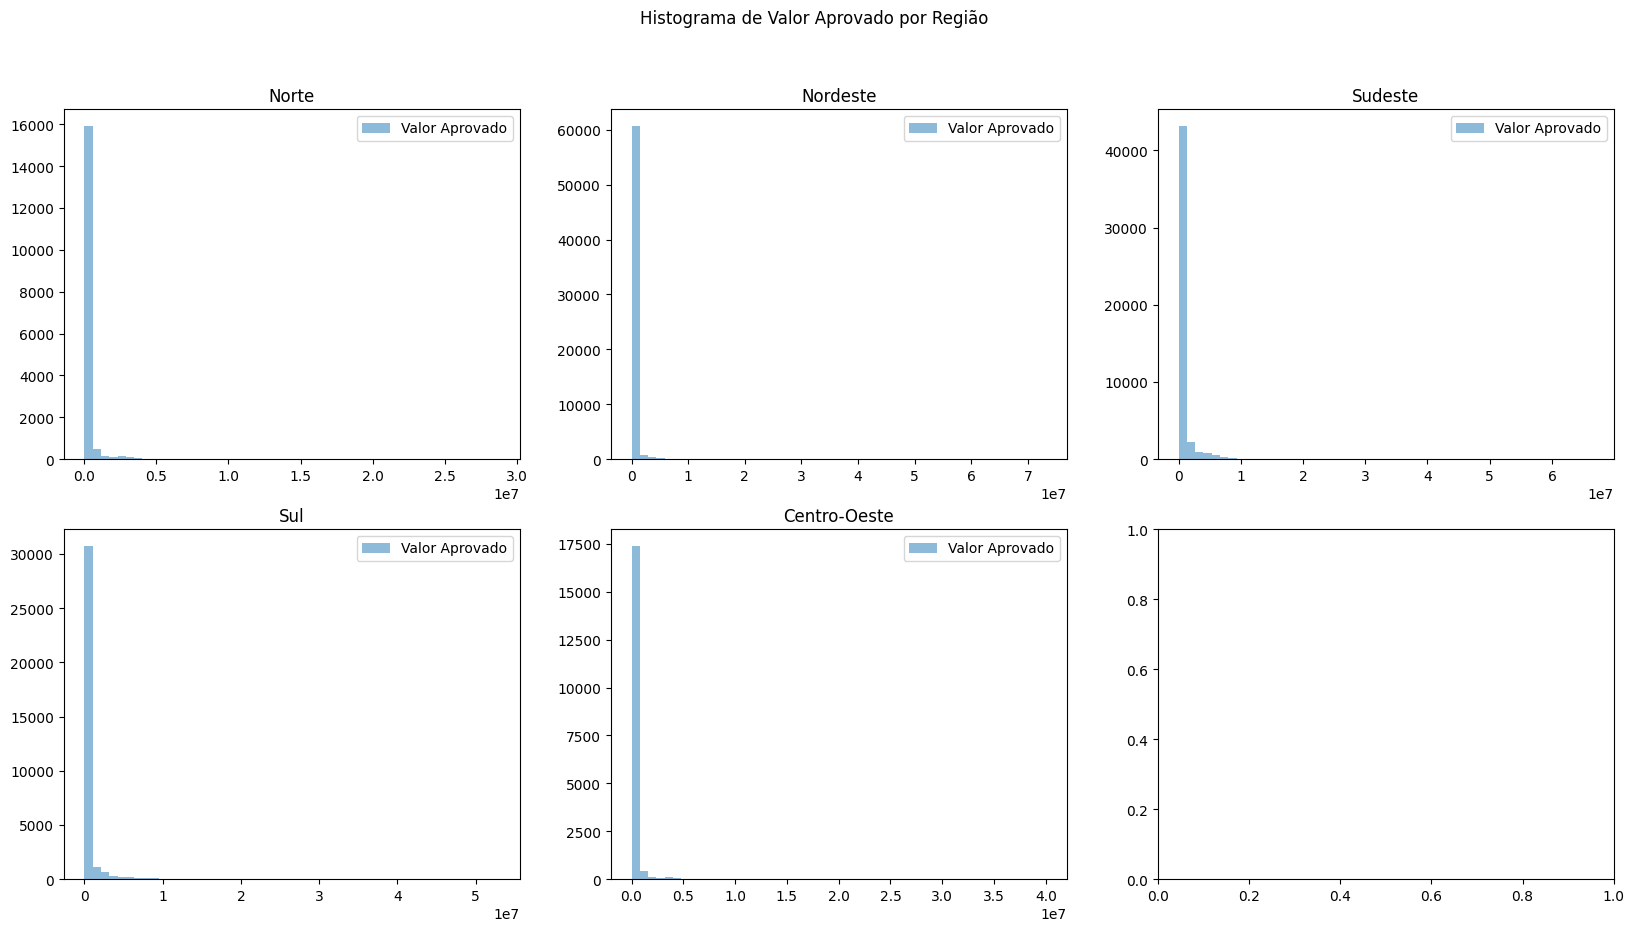

In [52]:
fig, axs = plt.subplots(2, 3, figsize=(20, 10))
fig.suptitle('Histograma de Valor Aprovado por Região')
for i, regiao in enumerate(df['Região'].unique()):
    df_regiao = df[df['Região'] == regiao]
    axs[i//3, i%3].hist(df_regiao['Valor Aprovado'], bins=50, alpha=0.5, label='Valor Aprovado')
    axs[i//3, i%3].set_title(regiao)
    axs[i//3, i%3].legend()

plt.show()

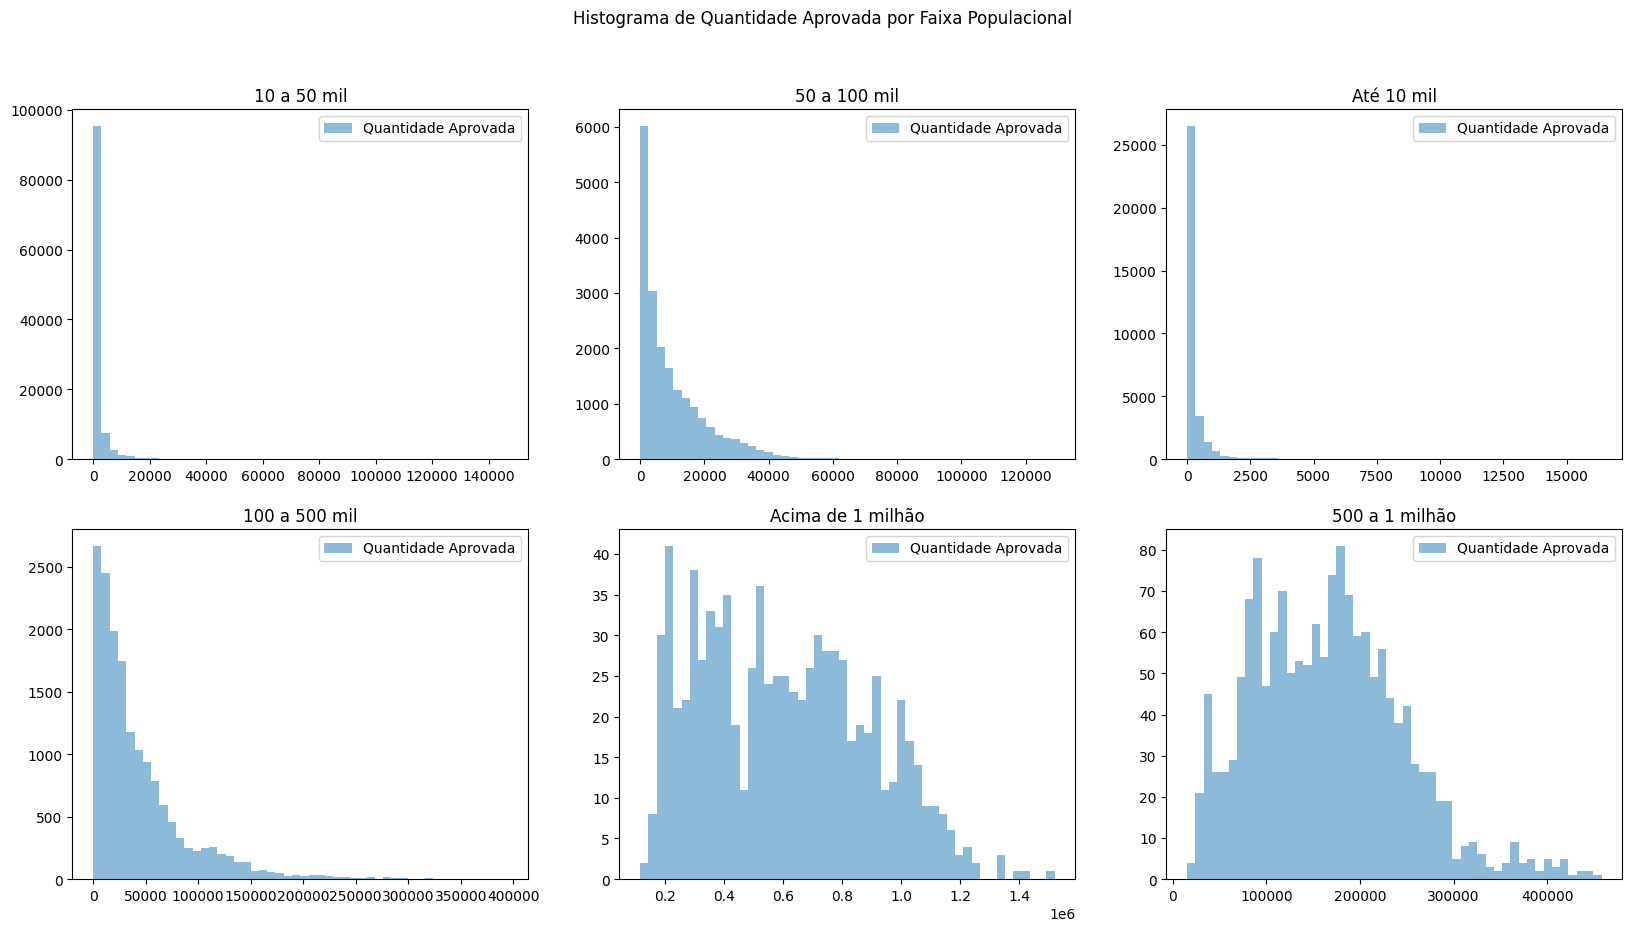

In [53]:
fig, axs = plt.subplots(2, 3, figsize=(20, 10))
fig.suptitle('Histograma de Quantidade Aprovada por Faixa Populacional')
for i, faixa in enumerate(df['Faixa Populacional'].unique()):
    df_faixa = df[df['Faixa Populacional'] == faixa]
    axs[i//3, i%3].hist(df_faixa['Quantidade Aprovada'], bins=50, alpha=0.5, label='Quantidade Aprovada')
    axs[i//3, i%3].set_title(faixa)
    axs[i//3, i%3].legend()

plt.show()

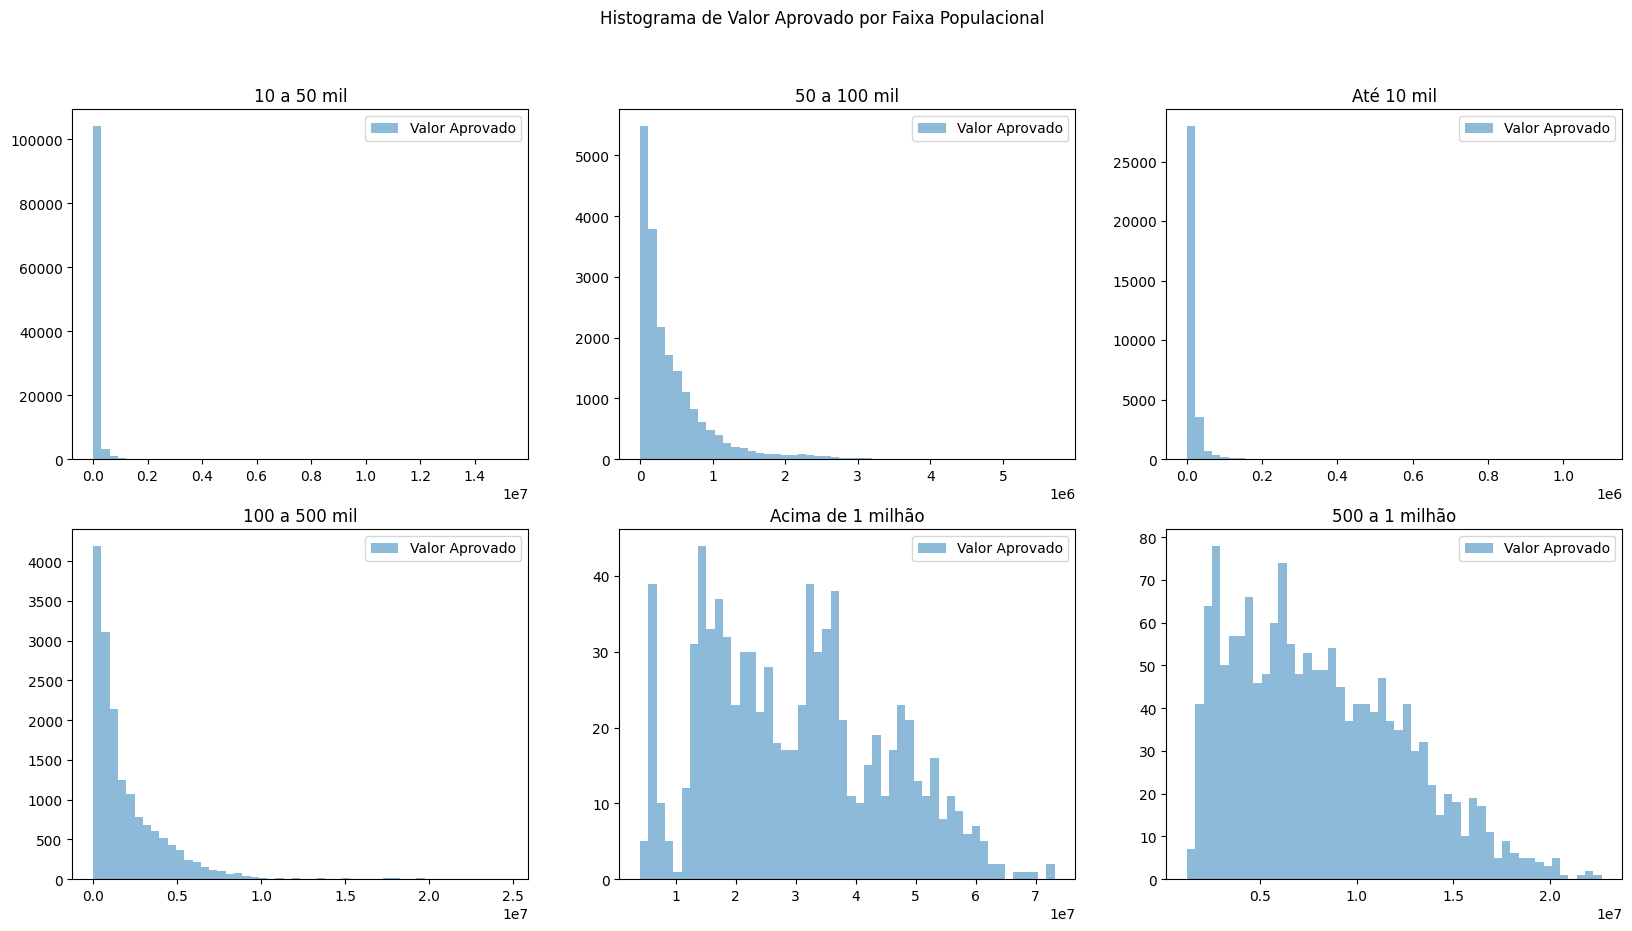

In [54]:
fig, axs = plt.subplots(2, 3, figsize=(20, 10))
fig.suptitle('Histograma de Valor Aprovado por Faixa Populacional')
for i, faixa in enumerate(df['Faixa Populacional'].unique()):
    df_faixa = df[df['Faixa Populacional'] == faixa]
    axs[i//3, i%3].hist(df_faixa['Valor Aprovado'], bins=50, alpha=0.5, label='Valor Aprovado')
    axs[i//3, i%3].set_title(faixa)
    axs[i//3, i%3].legend()

plt.show()

#### Correlação

In [55]:
X = df['Quantidade Aprovada'].values.reshape(-1, 1)
y = df['Valor Aprovado'].values

model = LinearRegression()
model.fit(X, y)

print('Coeficiente: ', model.coef_)
print('Intercepto: ', model.intercept_)
print('R2: ', model.score(X, y))

# O coeficiente indica que para cada unidade de quantidade aprovada, o valor aprovado aumenta em 47.00365282.
# O intercepto indica que o valor aprovado começa em 6934.528396430833 quando a quantidade aprovada é 0.
# O R2 indica que o modelo explica 88% da variabilidade do valor aprovado.

Coeficiente:  [47.00365282]
Intercepto:  6934.528396430833
R2:  0.8818027482055415


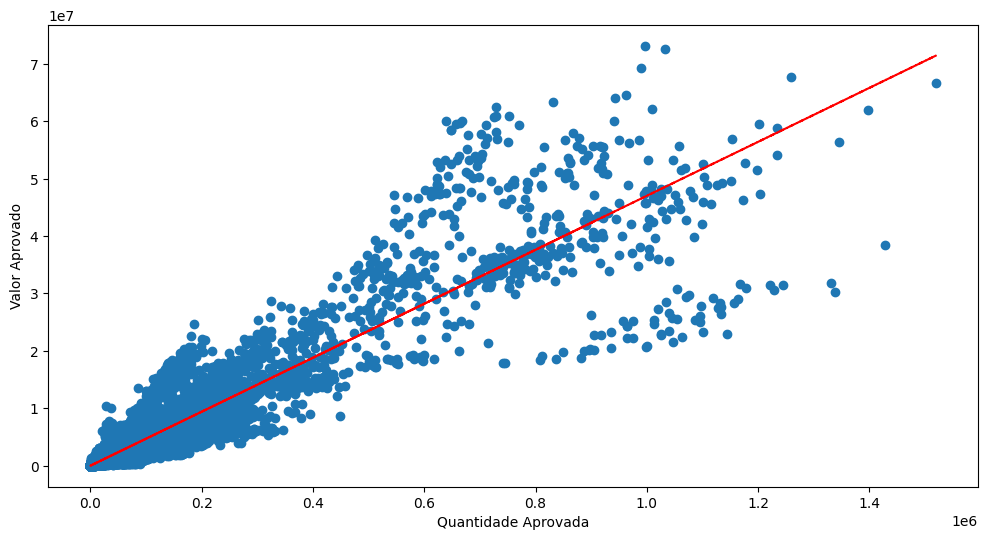

,Quantidade Aprovada,Valor Aprovado
Quantidade Aprovada,1.000,0.939
Valor Aprovado,0.939,1.000


In [56]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.scatter(df['Quantidade Aprovada'], df['Valor Aprovado'])
ax.set_xlabel('Quantidade Aprovada')
ax.set_ylabel('Valor Aprovado')
#adicionar uma linha de tendência
z = np.polyfit(df['Quantidade Aprovada'], df['Valor Aprovado'], 1)
p = np.poly1d(z)
plt.plot(df['Quantidade Aprovada'],p(df['Quantidade Aprovada']),"r--")

plt.show()

#calcular o pearson
df[['Quantidade Aprovada', 'Valor Aprovado']].corr()

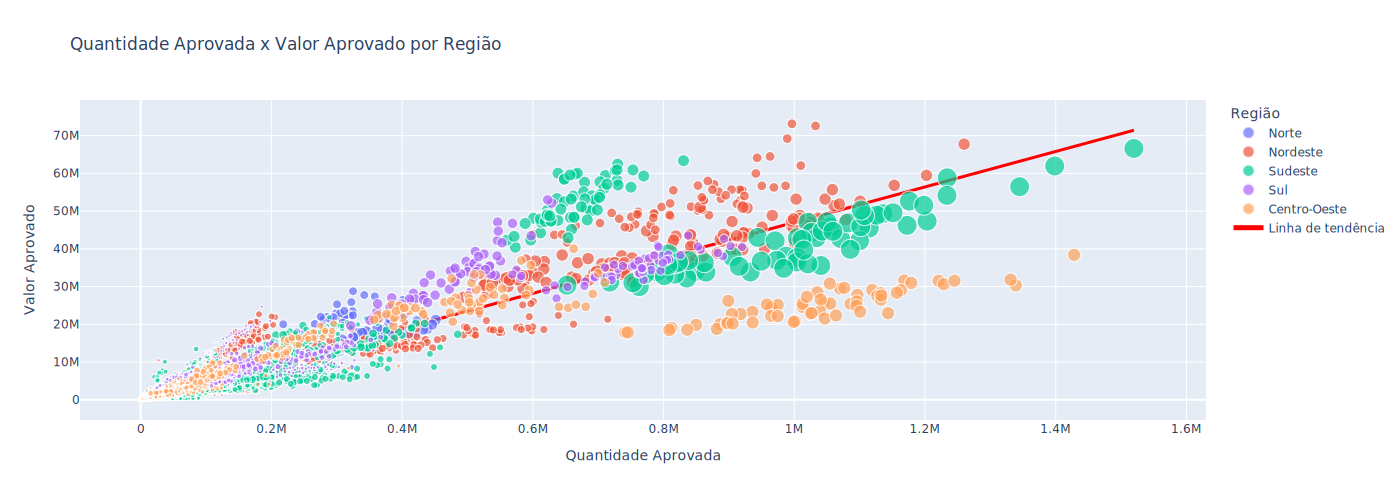

In [57]:
fig = px.scatter(df, x='Quantidade Aprovada', y='Valor Aprovado', color='Região', size='População', hover_data=['Município'], title='Quantidade Aprovada x Valor Aprovado por Região')
fig.update_layout(xaxis_title='Quantidade Aprovada', yaxis_title='Valor Aprovado')
fig.update_layout(width=1400)
z = np.polyfit(df['Quantidade Aprovada'], df['Valor Aprovado'], 1)
p = np.poly1d(z)
fig.add_trace(go.Scatter(x=df['Quantidade Aprovada'], y=p(df['Quantidade Aprovada']), mode='lines', name='Linha de tendência', line=dict(color='red', width=3)))
fig.show('svg')

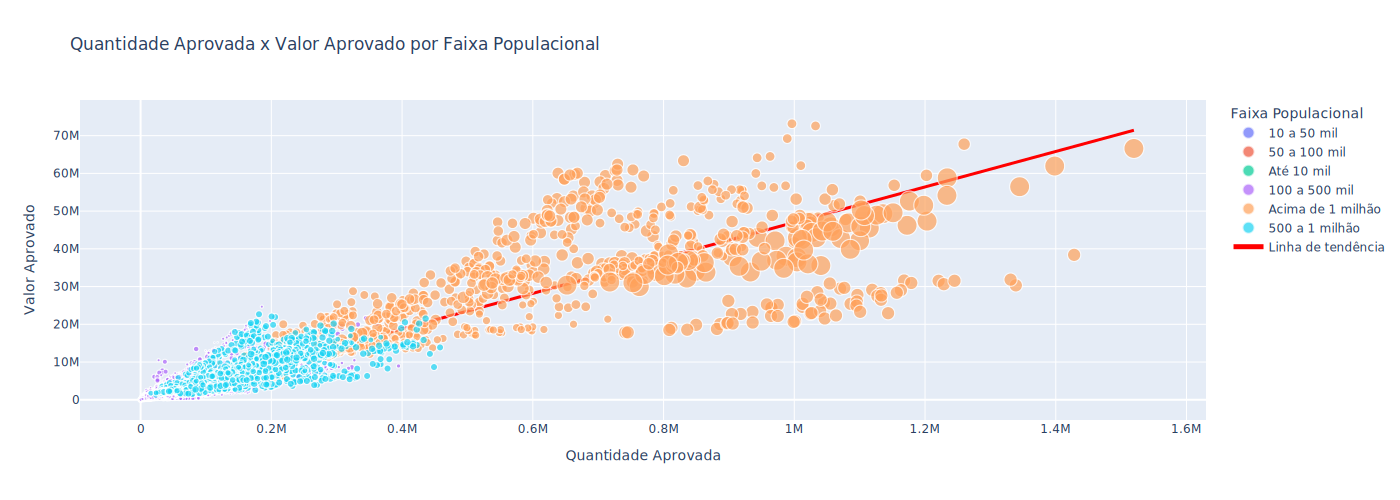

In [58]:
fig = px.scatter(df, x='Quantidade Aprovada', y='Valor Aprovado', color='Faixa Populacional', size='População', hover_data=['Município'], title='Quantidade Aprovada x Valor Aprovado por Faixa Populacional')
fig.update_layout(xaxis_title='Quantidade Aprovada', yaxis_title='Valor Aprovado')
fig.update_layout(width=1400)
z = np.polyfit(df['Quantidade Aprovada'], df['Valor Aprovado'], 1)
p = np.poly1d(z)
fig.add_trace(go.Scatter(x=df['Quantidade Aprovada'], y=p(df['Quantidade Aprovada']), mode='lines', name='Linha de tendência', line=dict(color='red', width=3)))
fig.show('svg')

## Análise Temporal

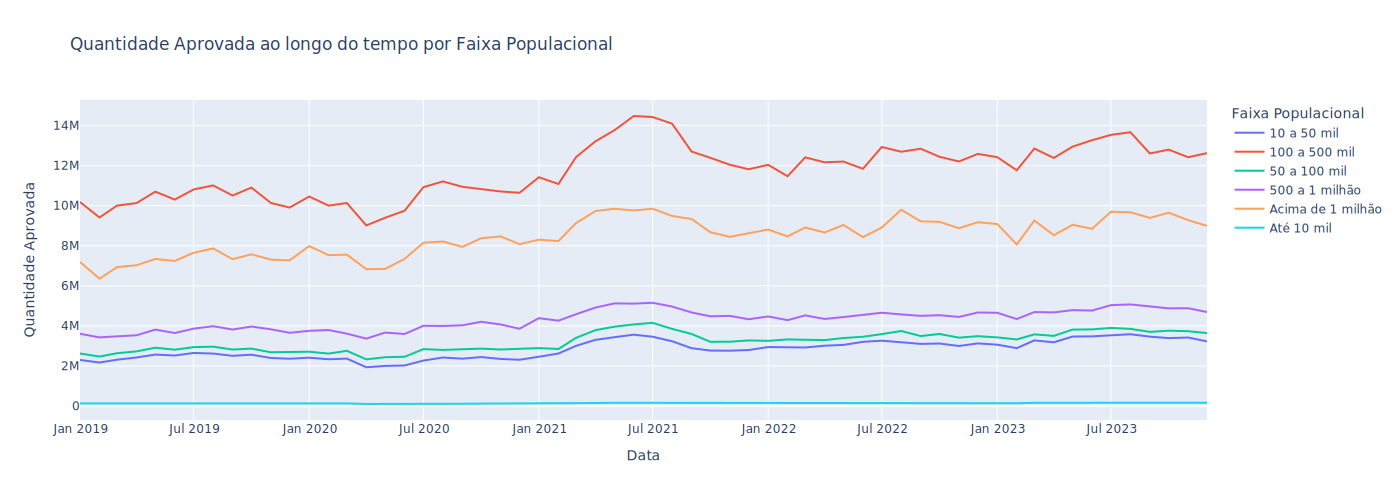

In [59]:
df_group = df.groupby(['Data', 'Faixa Populacional'])['Quantidade Aprovada'].sum().reset_index()
fig = px.line(df_group, x='Data', y='Quantidade Aprovada', color='Faixa Populacional', title='Quantidade Aprovada ao longo do tempo por Faixa Populacional')
fig.update_layout(xaxis_title='Data', yaxis_title='Quantidade Aprovada')
fig.update_layout(width=1400)
fig.show('svg')

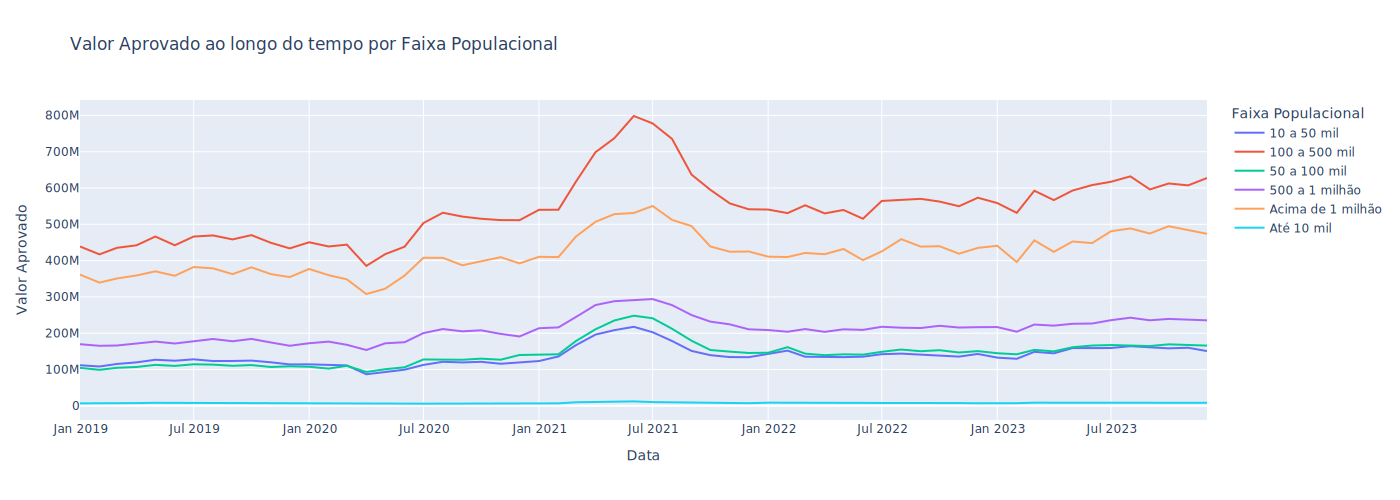

In [60]:
df_group = df.groupby(['Data', 'Faixa Populacional'])['Valor Aprovado'].sum().reset_index()
fig = px.line(df_group, x='Data', y='Valor Aprovado', color='Faixa Populacional', title='Valor Aprovado ao longo do tempo por Faixa Populacional')
fig.update_layout(xaxis_title='Data', yaxis_title='Valor Aprovado')
fig.update_layout(width=1400)
fig.show('svg')

Coeficiente:  [1978104.33333333]
Intercepto:  -3967084410.6
R2:  0.6045010847021526


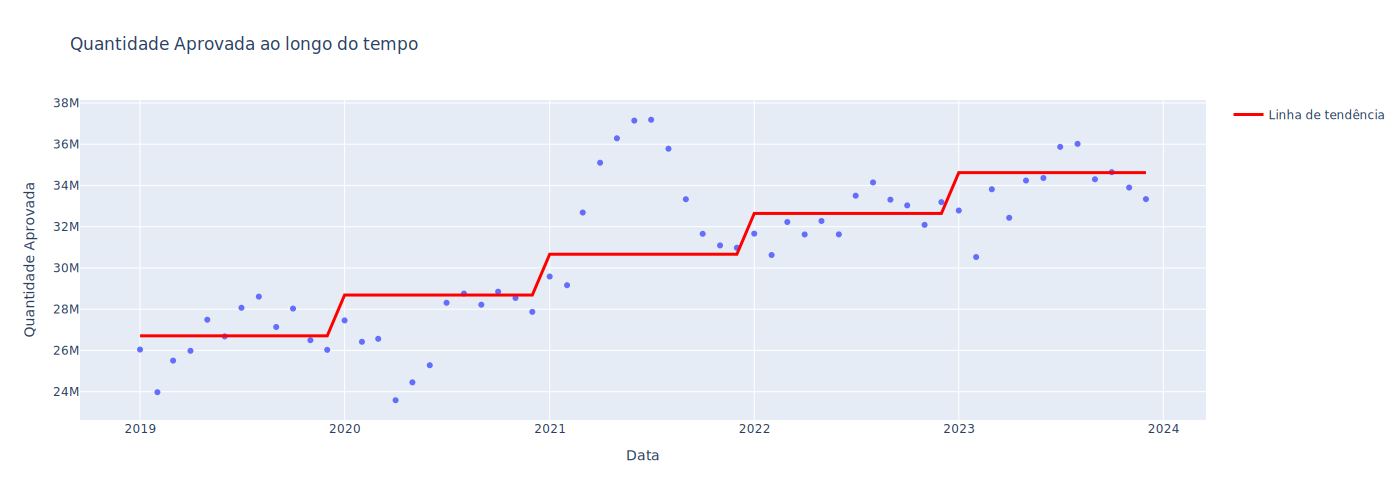

In [61]:
df_group = df.groupby('Data')['Quantidade Aprovada'].sum().reset_index()
X = df_group['Data'].dt.year.values.reshape(-1, 1)
y = df_group['Quantidade Aprovada'].values

model = LinearRegression()
model.fit(X, y)

print('Coeficiente: ', model.coef_)
print('Intercepto: ', model.intercept_)
print('R2: ', model.score(X, y))

fig = px.scatter(df_group, x='Data', y='Quantidade Aprovada', title='Quantidade Aprovada ao longo do tempo')
fig.update_layout(xaxis_title='Data', yaxis_title='Quantidade Aprovada')
fig.update_layout(width=1400)
z = np.polyfit(df_group['Data'].dt.year, df_group['Quantidade Aprovada'], 1)
p = np.poly1d(z)
fig.add_trace(go.Scatter(x=df_group['Data'], y=p(df_group['Data'].dt.year), mode='lines', name='Linha de tendência', line=dict(color='red', width=3)))
fig.show('svg')

Coeficiente:  [98288411.38666666]
Intercepto:  -197178679211.74982
R2:  0.3496147557189948


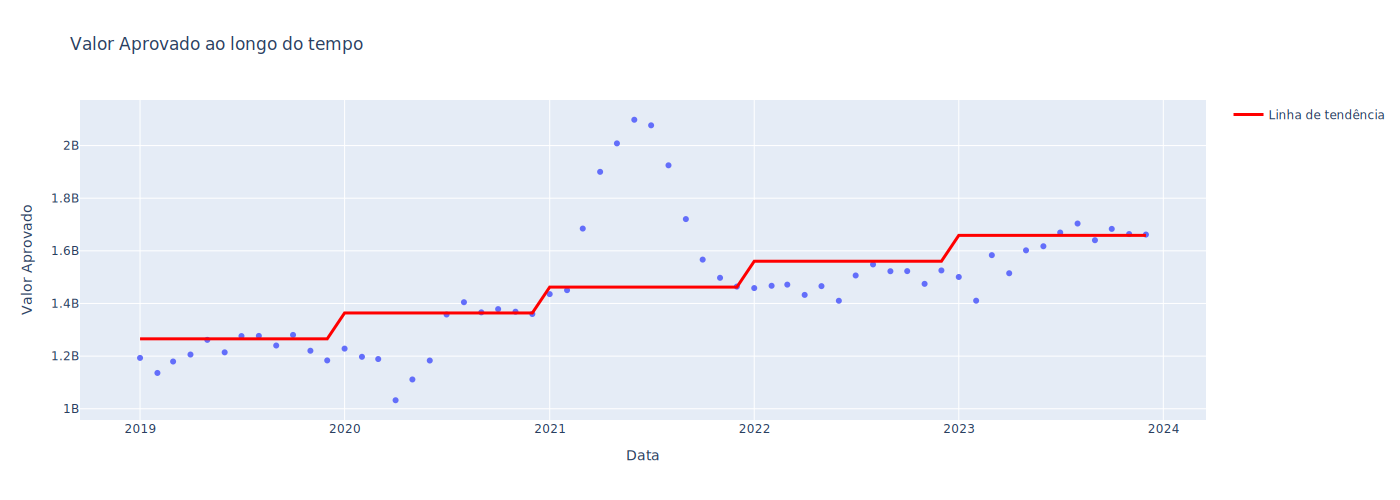

In [62]:
df_group = df.groupby('Data')['Valor Aprovado'].sum().reset_index()
X = df_group['Data'].dt.year.values.reshape(-1, 1)
y = df_group['Valor Aprovado'].values

model = LinearRegression()
model.fit(X, y)

print('Coeficiente: ', model.coef_)
print('Intercepto: ', model.intercept_)
print('R2: ', model.score(X, y))

fig = px.scatter(df_group, x='Data', y='Valor Aprovado', title='Valor Aprovado ao longo do tempo')
fig.update_layout(xaxis_title='Data', yaxis_title='Valor Aprovado')
fig.update_layout(width=1400)
z = np.polyfit(df_group['Data'].dt.year, df_group['Valor Aprovado'], 1)
p = np.poly1d(z)
fig.add_trace(go.Scatter(x=df_group['Data'], y=p(df_group['Data'].dt.year), mode='lines', name='Linha de tendência', line=dict(color='red', width=3)))
fig.show('svg')

## Análise Geográfica

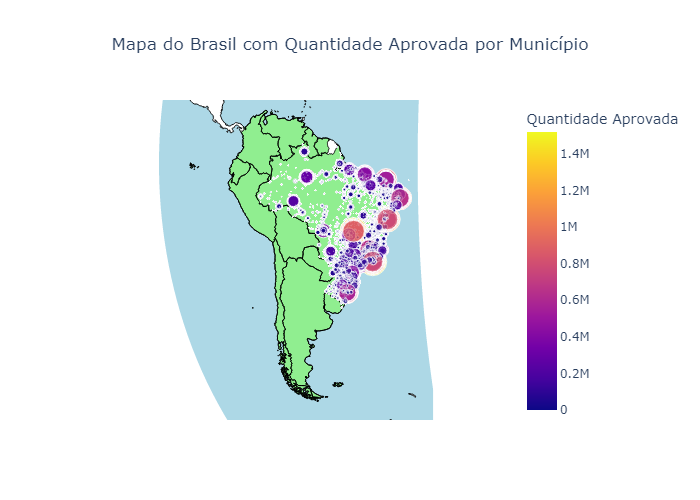

In [65]:
fig = px.scatter_geo(df,
                     lat='LATITUDE',
                     lon='LONGITUDE',
                     color='Quantidade Aprovada',
                     hover_name='Município',
                     size='Quantidade Aprovada',
                     projection="natural earth",
                     title="Mapa do Brasil com Quantidade Aprovada por Município")

# Ajustar o layout
fig.update_geos(
    visible=False, 
    resolution=50,
    showcountries=True, countrycolor="Black",
    showcoastlines=True, coastlinecolor="Black",
    showland=True, landcolor="LightGreen",
    showocean=True, oceancolor="LightBlue"
)

fig.update_layout(
    title='Mapa do Brasil com Quantidade Aprovada por Município',
    title_x=0.5,
    geo=dict(
        scope='south america',
    )
)

fig.show('png')

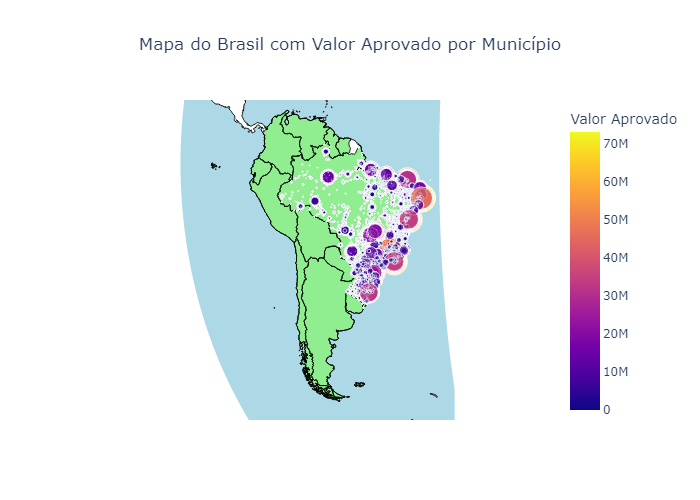

In [66]:
fig = px.scatter_geo(df,
                     lat='LATITUDE',
                     lon='LONGITUDE',
                     color='Valor Aprovado',
                     hover_name='Município',
                     size='Valor Aprovado',
                     projection="natural earth",
                     title="Mapa do Brasil com Valor Aprovado por Município")

# Ajustar o layout
fig.update_geos(
    visible=False, 
    resolution=50,
    showcountries=True, countrycolor="Black",
    showcoastlines=True, coastlinecolor="Black",
    showland=True, landcolor="LightGreen",
    showocean=True, oceancolor="LightBlue"
)

fig.update_layout(
    title='Mapa do Brasil com Valor Aprovado por Município',
    title_x=0.5,
    geo=dict(
        scope='south america',
    )
)

fig.show('png')